# Get Galaxies From Halos

info: https://cdcvs.fnal.gov/redmine/projects/des-clusters/wiki/ClustDataVecY3 <br>
path: /data/des81.b/data/mariaeli/y3_buzz/Buzzard-3_v2.0_Y3a_mastercat/

In [20]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.table import Table, vstack
from astropy.io.fits import getdata

import pandas as pd

import esutil

## Load

In [2]:
import h5py

#path   = '/data/des81.b/data/mariaeli/y3_buzz/Buzzard-3_v2.0_Y3a_mastercat/'
path   = '/global/project/projectdirs/des/jderose/Chinchilla/Herd/Chinchilla-3/v1.9.8/sampleselection/Y3a/mastercat/'
fname  = path+'Buzzard_v1.9.8_Y3a_gold.h5'
fname_aux  = path+'Buzzard-3_v1.9.8_Y3a_mastercat.h5'

master = h5py.File(fname,'r')
indexes= h5py.File(fname_aux,'r')

In [3]:
ls /global/project/projectdirs/des/jderose/Chinchilla/Herd/Chinchilla-3/v1.9.8/sampleselection/Y3a/mastercat/

Buzzard-3_v1.9.8_Y3a_mastercat.h5  Buzzard_v1.9.8_Y3a_shape.h5
Buzzard-3_v2.0_Y3a_mastercat.h5    Buzzard_v2.0_Y3a_gold.h5
Buzzard_v1.9.8_Y3a_bpz.h5          Y3_GOLD_2_2_1_maps_copy.h5
Buzzard_v1.9.8_Y3a_gold.h5         buzzard-1.9.8_3y3a_run_redmapper_v6.4.22.h5


In [4]:
def show_h5_group(name,node):
    ''' show all the h5 groups
    Example:
    fmaster = h5py.File(copa.master_fname,'r')
    fmaster.visititems(show_h5_group)

    ## https://stackoverflow.com/questions/45562169/traverse-hdf5-file-tree-and-continue-after-return
    '''
    if isinstance(node, h5py.Group):
        print(name,node)
    return None

def show_h5_dataset(name,node):
    if isinstance(node, h5py.Dataset):
        print(name,node)
    return None

In [5]:
columns = ['hpix_16384','haloid','coadd_object_id','ra','dec','rhalo']
columns+= ['mag_%s'%(ix) for ix in ['g','r','i','z']]
columns+= ['mag_err_%s'%(ix) for ix in ['g','r','i','z']]

In [6]:
columns

['hpix_16384',
 'haloid',
 'coadd_object_id',
 'ra',
 'dec',
 'rhalo',
 'mag_g',
 'mag_r',
 'mag_i',
 'mag_z',
 'mag_err_g',
 'mag_err_r',
 'mag_err_i',
 'mag_err_z']

In [7]:
master.visititems(show_h5_dataset)

catalog/gold/coadd_object_id <HDF5 dataset "coadd_object_id": shape (1505017869,), type ">i8">
catalog/gold/dec <HDF5 dataset "dec": shape (1505017869,), type ">f4">
catalog/gold/flags_gold <HDF5 dataset "flags_gold": shape (1505017869,), type ">i8">
catalog/gold/flux_g <HDF5 dataset "flux_g": shape (1505017869,), type ">f4">
catalog/gold/flux_i <HDF5 dataset "flux_i": shape (1505017869,), type ">f4">
catalog/gold/flux_r <HDF5 dataset "flux_r": shape (1505017869,), type ">f4">
catalog/gold/flux_z <HDF5 dataset "flux_z": shape (1505017869,), type ">f4">
catalog/gold/haloid <HDF5 dataset "haloid": shape (1505017869,), type ">i8">
catalog/gold/hpix_16384 <HDF5 dataset "hpix_16384": shape (1505017869,), type ">i8">
catalog/gold/ivar_g <HDF5 dataset "ivar_g": shape (1505017869,), type ">f4">
catalog/gold/ivar_i <HDF5 dataset "ivar_i": shape (1505017869,), type ">f4">
catalog/gold/ivar_r <HDF5 dataset "ivar_r": shape (1505017869,), type ">f4">
catalog/gold/ivar_z <HDF5 dataset "ivar_z": shap

In [8]:
indexes['index'].visititems(show_h5_dataset)

bpz/match_gold <HDF5 dataset "match_gold": shape (1505017869,), type "<i8">
bpz/select <HDF5 dataset "select": shape (1505017869,), type "<i8">
catalog/maglim/select <HDF5 dataset "select": shape (13438886,), type "<i8">
coadd_object_id <HDF5 dataset "coadd_object_id": shape (1505017869,), type "<i8">
gold/select <HDF5 dataset "select": shape (1505017869,), type "<i8">
maglim/random_select <HDF5 dataset "random_select": shape (250492120,), type "<i8">
maglim/select <HDF5 dataset "select": shape (12524606,), type "<i8">
mask/fracgood <HDF5 dataset "fracgood": shape (21007033,), type "<i8">
mask/hpix <HDF5 dataset "hpix": shape (21007033,), type "<i8">
mask/maskfrac_est <HDF5 dataset "maskfrac_est": shape (21007033,), type "<i8">
mask/zmax <HDF5 dataset "zmax": shape (21007033,), type "<i8">
metacal/match_gold <HDF5 dataset "match_gold": shape (1505017869,), type "<i8">
randoms/maglim/select <HDF5 dataset "select": shape (268777720,), type "<i8">
redmagic/combined_sample_fid/match_gold <

In [9]:
select     = indexes['index/gold/select'][:]
mag_i      = master['catalog/gold/mag_i'][:][select]
maglim_idx = select[np.where(mag_i<=24.)]
hpx16384   = master['catalog/gold/hpix_16384'][:][maglim_idx]
#mids       = master['catalog/gold/coadd_object_id'][:][maglim_idx]

#maglim_idx = select[np.where(mag_i<=24.)]
select=mag_i=0

master.close()
indexes.close()

### Loading Data

In [10]:
## Healpix map
Nside    = 2
outdir   = '/global/project/projectdirs/des/jesteves/buzzardSelection/y3_v2.0.0/'
hpx_file = outdir+'tiles/hpxmap_nside%i_buzzard_y3_v2.0.0.fits'%Nside

In [11]:
hpx_map = Table(getdata(hpx_file))
tiles   = np.where(hpx_map['hpx_value']>0)[0]

In [12]:
tiles

array([ 0, 16, 17, 18, 19, 20, 22, 32, 33, 34, 35, 38, 44, 45, 46, 47])

In [13]:
## Get Cluster Catalog

outdir = '/global/project/projectdirs/des/jesteves/buzzardSelection/y3_v2.0.0/'
name   = outdir+'halos/buzzard_y3_v2.0.0_golden_halos.fits'

cat = Table(getdata(name))

In [14]:
cat

haloid,coadd_object_id,RA,DEC,M200,R200,MAG_I,redshift,magLim,hpx8,hpx4,hpx2
int64,int64,float32,float32,float32,float32,float32,float64,float64,int64,int64,int64
12109345,34000000190,87.67945,-31.286345,53750000000000.0,0.811507,15.644118,0.12207666344755042,18.727379942055908,80,80,20
7921723,106000000031,17.458162,-37.26816,54520000000000.0,0.823985,15.9647045,0.15707450057296524,19.299043008021513,138,138,34
12127773,41000000098,84.258545,-38.53852,52040000000000.0,0.806834,16.234589,0.1376620470619489,19.00025480005313,133,133,33
10295050,5000000068,44.179226,-15.528681,50970000000000.0,0.802234,16.17392,0.14417593382404809,19.10681494118477,143,143,35
10559488,359000989610,29.339111,3.0369565,59480000000000.0,0.844769,16.401712,0.14416136199711516,19.106581791953843,69,69,17
8146031,369000000069,15.199777,-2.195923,54050000000000.0,0.822436,16.283852,0.15945146239187055,19.332320473486188,70,70,17
10030365,48006301558,59.113914,-41.401073,58910000000000.0,0.843198,16.556578,0.14710242891679756,19.15363886266876,134,134,33
10049271,53006584760,35.619694,-61.57988,53050000000000.0,0.814796,16.727932,0.15048246889904238,19.206754564586593,130,130,32
10294725,7000000067,51.846664,-16.289898,51970000000000.0,0.80679,17.323595,0.13937409684592666,19.02935964638075,141,141,35


In [ ]:
# ra_min,ra_max   = 26.,30.
# dec_min,dec_max = -44.5,-43.

# mask = (cat['RA']<ra_max)&(cat['RA']>ra_min)
# mask&= (cat['DEC']<dec_max)&(cat['DEC']>dec_min)

### Healpix Matching

In [15]:
import sys
# sys.path.append('/home/s1/jesteves/git/buzzardAnalysis/buzzardSelection/scripts/')
sys.path.append('/global/u2/j/jesteves/codes/buzzardAnalysis/buzzardSelection/scripts/')
from helper import AngularDistance,get_healpix_list

In [16]:
rad2deg  = 180/np.pi
rmax     = 8 #Mpc around each cluster

r200     = cat['R200'][:]*0.7 ## Mpc
DA       = AngularDistance(np.array(cat['redshift']))

## compute the radii max
cat['rmax']  = 60*(float(rmax)/DA)*rad2deg ## arcmin

In [17]:
Nside = 16384
cluster_tile = cat['hpx2']

### Retrieving Galaxy Catalogs

In [18]:
def save_hdf5_output(gal,cat,outfile):
    df  = gal.to_pandas()
    df.to_hdf(outfile, key='members', mode='w')

    gal = 0

    dfc = cat.to_pandas()
    dfc.to_hdf(outfile, key='cluster', mode='a')

In [19]:
def load_hdf_files(infile,indices,columns,path='catalog/gold/'):
    master = h5py.File(infile,'r')
    gold   = master[path]
    
    mydict = dict().fromkeys(columns)
    for col in columns:
        mydict[col] = gold[col][:][indices]
    
    master.close()
    return Table(mydict)

In [21]:
from time import time

In [22]:
fname  = path+'Buzzard_v1.9.8_Y3a_bpz.h5'
indexes= h5py.File(fname)
bpz    = indexes['catalog/bpz']

#b_cid  = bpz['coadd_object_id'][:][maglim_idx]
z      = bpz['z'][:][maglim_idx]
zmean  = bpz['zmean_sof'][:][maglim_idx]

indexes.close()

In [24]:
indexes= h5py.File(fname_aux,'r')
dnf    = indexes['catalog/dnf/unsheared']

#d_cid  = dnf['coadd_object_id'][:][maglim_idx]
#d_z    = dnf['z'][:][maglim_idx]
d_zmean= dnf['z_mean'][:][maglim_idx]
d_sigma= dnf['z_sigma'][:][maglim_idx]

indexes.close()

In [ ]:
## BE CAREFULL! The cells below take about an hour to run

In [25]:
outdir = '/global/project/projectdirs/des/jesteves/buzzardSelection/y3_v2.0.0/tiles/'
outfile_base = outdir+'buzzard_y3_v2.0.0_golden_{}.hdf'

In [26]:
fname  = path+'Buzzard_v1.9.8_Y3a_gold.h5'

t0 = time()

time_evolution = np.empty((len(tiles)+1,),dtype=np.float64)
time_evolution[0] = t0

for i, tile in enumerate(tiles):
    print('start tile: %i'%(tile))
    
    w      = esutil.numpy_util.where1(cluster_tile==tile)
    circles= get_healpix_list(cat[w],nside=Nside)
    
    match  = esutil.numpy_util.match(circles,hpx16384)
    indices= maglim_idx[match[1]]
    
    data        = load_hdf_files(fname,indices,columns,path='catalog/gold/')
    data['z']          = z[match[1]]
    data['z_mean_bpz'] = zmean[match[1]]

    data['z_mean_dnf'] = d_zmean[match[1]]
    data['z_sigma_dnf']= d_sigma[match[1]]
    
    data['index']= indices
    data['tile'] = tile
    time_evolution[i+1] = time()
    
    outfile = outfile_base.format(tile)
    save_hdf5_output(data,cat[w],outfile)
    data = 0
    print('outfile saved: %s'%(outfile))
    
    print('partial time: %.2f min'%((time_evolution[i+1]-time_evolution[i])/60.))
    print('run time    : %.2f min'%((time_evolution[i+1]-time_evolution[0])/60.))
    print('\n')

start tile: 0
outfile saved: /global/project/projectdirs/des/jesteves/buzzardSelection/y3_v2.0.0/tiles/buzzard_y3_v2.0.0_golden_0.hdf
partial time: 3.70 min
run time    : 3.70 min


start tile: 16
outfile saved: /global/project/projectdirs/des/jesteves/buzzardSelection/y3_v2.0.0/tiles/buzzard_y3_v2.0.0_golden_16.hdf
partial time: 3.66 min
run time    : 7.35 min


start tile: 17
outfile saved: /global/project/projectdirs/des/jesteves/buzzardSelection/y3_v2.0.0/tiles/buzzard_y3_v2.0.0_golden_17.hdf
partial time: 3.95 min
run time    : 11.30 min


start tile: 18
outfile saved: /global/project/projectdirs/des/jesteves/buzzardSelection/y3_v2.0.0/tiles/buzzard_y3_v2.0.0_golden_18.hdf
partial time: 3.53 min
run time    : 14.83 min


start tile: 19
outfile saved: /global/project/projectdirs/des/jesteves/buzzardSelection/y3_v2.0.0/tiles/buzzard_y3_v2.0.0_golden_19.hdf
partial time: 3.66 min
run time    : 18.49 min


start tile: 20
outfile saved: /global/project/projectdirs/des/jesteves/buzzardS

In [ ]:
## In case that the memory crashes, delete the photoz variables (z,zmean,d_zmean,d_sigma) and run the cell below

In [ ]:
# fname     = path+'Buzzard_v1.9.8_Y3a_gold.h5'
# fname_bpz = path+'Buzzard_v1.9.8_Y3a_bpz.h5'
# fname_dnf = fname_aux

# t0 = time()

# time_evolution = np.empty((len(tiles)+1,),dtype=np.float64)
# time_evolution[0] = t0

# for i, tile in enumerate(tiles):
#     print('start tile: %i'%(tile))
    
#     w      = esutil.numpy_util.where1(cluster_tile==tile)
#     circles= get_healpix_list(cat[w],nside=Nside)
    
#     match  = esutil.numpy_util.match(circles,hpx16384)
#     indices= maglim_idx[match[1]]
    
#     data = load_hdf_files(fname,indices,columns,path='catalog/gold/')
#     bpz  = load_hdf_files(fname_bpz,indices,['z','zmean_sof'],path='catalog/bpz/')
#     dnf  = load_hdf_files(fname_aux,indices,['z_mean','z_sigma'],path='catalog/dnf/unsheared')
    
#     data['z']          = bpz['z']
#     data['z_mean_bpz'] = bpz['zmean_sof']

#     data['z_mean_dnf'] = dnf['z_mean']
#     data['z_sigma_dnf']= dnf['z_sigma']
    
#     data['index']= indices
#     data['tile'] = tile
#     time_evolution[i+1] = time()
    
#     outfile = outfile_base.format(tile)
#     save_hdf5_output(data,cat[w],outfile)
#     data = 0
#     print('outfile saved: %s'%(outfile))
    
#     print('partial time: %.2f min'%((time_evolution[i+1]-time_evolution[i])/60.))
#     print('run time    : %.2f min'%((time_evolution[i+1]-time_evolution[0])/60.))
#     print('\n')

In [17]:
import pandas as pd
def upload_dataFrame(infile,keys='members'):
    hdf = pd.HDFStore(infile, mode='r')
    df1 = hdf.get(keys)
    hdf.close()
    data = Table.from_pandas(df1)
    return data

In [18]:
outdir = '/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/'
files  = glob.glob(outdir+'buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8*.hdf5')
outfile = files[3]

In [21]:
gi = upload_dataFrame(outfile,keys='members')

In [22]:
gi

hpix_16384,haloid,coadd_object_id,ra,dec,rhalo,mag_g,mag_r,mag_i,mag_z,mag_err_g,mag_err_r,mag_err_i,mag_err_z,z,z_mean_dnf,z_sigma_dnf,index,tile
int64,int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,int64,int64
1075138416,0,105008499362,5.296536,-35.72796,0.0,25.533146,25.292902,23.590105,22.59278,0.529632,0.7691963,0.22851813,0.16298512,0.0,0.0,0.0,9640913,257
1075138421,18253824,105011910144,5.304697,-35.719368,0.4102478,25.149513,23.660486,22.47889,21.806288,0.3817489,0.18549159,0.09671724,0.08711142,0.6859338256905388,0.8497801044409988,0.23630268521951173,9640925,257
1075138421,18186077,105012055879,5.3049355,-35.719925,3.5830064,26.78362,23.888044,23.225847,23.382961,1.7393258,0.21963862,0.17004076,0.3219672,0.0,0.0,0.0,9640926,257
1075138422,18253824,105011854863,5.297073,-35.72123,0.27412614,25.165102,23.186338,21.78622,21.181803,0.3987388,0.1293551,0.058988005,0.056523193,0.6855052692325162,0.8136354771749703,0.030088041825376874,9640928,257
1075138423,18253824,105012055872,5.3005347,-35.719097,0.15284486,24.726446,24.337412,23.48961,24.038372,0.2629976,0.33283976,0.21450847,0.5760171,0.0,0.0,0.0,9640937,257
1075138424,19122245,105013066835,5.290674,-35.72386,0.19589654,24.577854,24.388575,23.047272,23.018784,0.23884574,0.3546612,0.14598331,0.22971016,0.0,0.0,0.0,9640942,257
1075138425,19048210,105011916643,5.2923307,-35.718082,5.657542,25.825407,23.662275,22.335054,22.244957,0.7119328,0.18243574,0.08188196,0.12557639,0.7189440200317792,0.7202460698025439,0.035517506320486364,9640943,257
1075138427,19073842,105011923949,5.2917643,-35.716362,5.5050225,25.171698,23.911045,22.53934,22.158192,0.3903163,0.23148859,0.09901509,0.11500125,0.7162454866675024,0.7828262391786459,0.13304672362192838,9640948,257
1075138427,7603786,105000204870,5.2909684,-35.7185,2.3938303,22.993427,22.691366,22.46394,22.339273,0.06878302,0.08979252,0.097085394,0.13298269,0.09688923313613988,0.12403293395394693,0.1869707220302761,9640949,257


(0.0, 1.0)

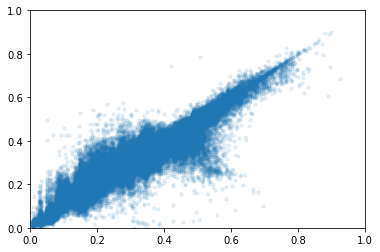

In [28]:
cut = gi['mag_i']<20.

z0,zend=0.,1.
plt.scatter(gi['z'][cut],gi['z_mean_dnf'][cut],alpha=0.1,s=10)
plt.xlim(z0,zend)
plt.ylim(z0,zend)

In [1]:
import os
import glob
import numpy as np
 
def get_healpix_list(file_list):
    healpix_list = []
    for infile in file_list:
        hpx = int(infile.split('_')[-1].split('.')[0])
        healpix_list.append(hpx)
    healpix_list = np.sort(np.array(healpix_list))
    return healpix_list
 
def rename_files(base_name,file_list):
    for infile in file_list:
        hpx = int(infile.split('_')[-1].split('.')[0])
        new_file = base_name.format(hpx)
        print((infile,new_file))
        os.rename(infile,new_file)

In [10]:
outdir = '/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/'
files  = glob.glob(outdir+'buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8*.hdf')


In [11]:
files

[]

In [4]:
healpix_list = get_healpix_list(files)
 
print(healpix_list)

[  0 256 257 260 261 263 269 271 272 273 274 275 276 277 278 279 280 281
 282 283 284 291 292 293 294 295 296 297 298 299 300 304 320 321 322 323
 328 329 330 352 518 519 521 522 523 524 525 526 527 528 529 530 531 532
 533 534 535 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550
 551 552 553 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568
 569 570 571 572 573 574 575 610 616 618 709 710 711 713 715 716 717 718
 719 720 721 722 723 724 725 726 728 729 730 731 740 741]


In [5]:
base_name = '/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8_{:05d}.hdf5'
rename_files(base_name,files)

('/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8_296.hdf', '/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8_00296.hdf5')
('/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8_0.hdf', '/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8_00000.hdf5')
('/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8_295.hdf', '/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8_00295.hdf5')
('/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8_256.hdf', '/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8_00256.h

('/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8_535.hdf', '/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8_00535.hdf5')
('/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8_536.hdf', '/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8_00536.hdf5')
('/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8_537.hdf', '/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8_00537.hdf5')
('/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8_538.hdf', '/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8_00538

('/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8_724.hdf', '/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8_00724.hdf5')
('/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8_725.hdf', '/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8_00725.hdf5')
('/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8_726.hdf', '/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8_00726.hdf5')
('/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8_728.hdf', '/data/des61.a/data/johnny/Buzzard/Buzzard_v2.0.0/y3_rm/tiles/buzzard_y3_v2.0.0_redmapper_heidi_lgt20_copper_hpx8_00728